In [ ]:
import numpy as np

In [2]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

In [3]:
from matplotlib import pyplot as plt

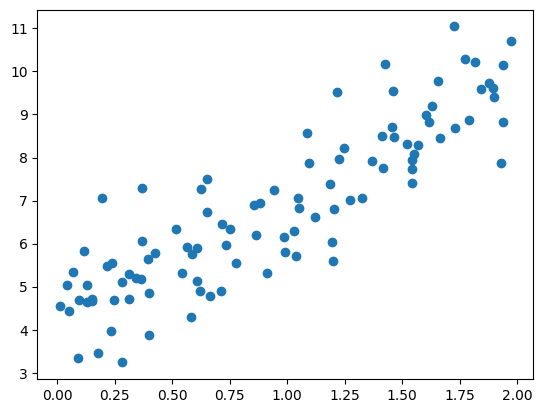

In [4]:
plt.scatter(X, y)

In [5]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

theta_best

array([[4.21509616],
       [2.77011339]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)

y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

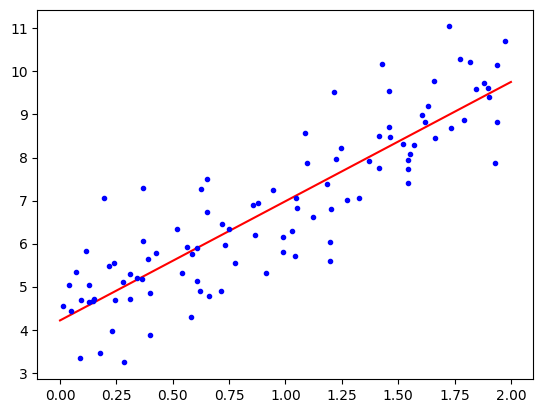

In [7]:
plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.plot(X, y, 'b.')
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [9]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd, residuals, rank, s

(array([[4.21509616],
        [2.77011339]]),
 array([80.6584564]),
 2,
 array([14.37020392,  4.11961067]))

In [11]:
eta = 0.1
n_epochs = 1000
m = len(X_b)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    g = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * g
    
theta

array([[4.21509616],
       [2.77011339]])

In [12]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:(random_index + 1)]
        yi = y[random_index:(random_index + 1)]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

theta

array([[4.21076011],
       [2.74856079]])

In [13]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

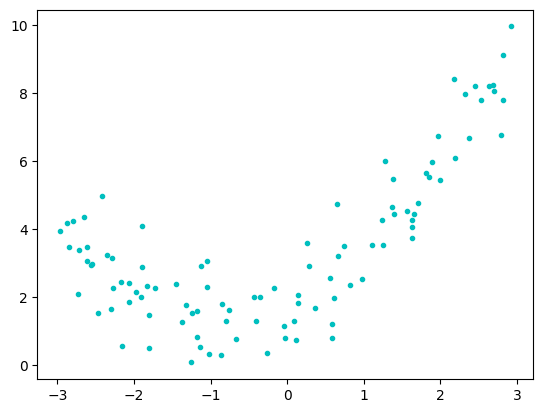

In [53]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X * X + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, 'c.')

In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X)

X[0], X_poly[0]

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

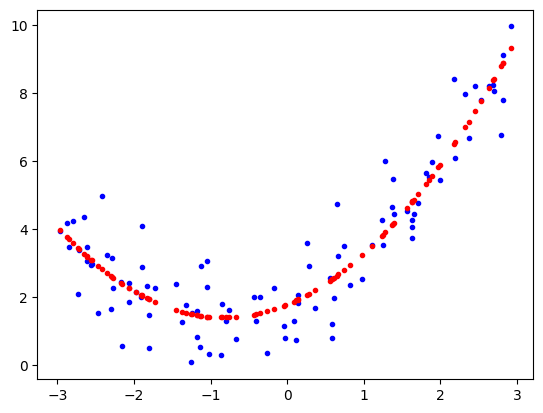

In [17]:
plt.plot(X, y, 'b.')
plt.plot(X, lin_reg.predict(X_poly), 'r.')

In [75]:
poly_features_300 = PolynomialFeatures(degree=300, include_bias=False)

X_poly = poly_features_300.fit_transform(X)

X.shape, X_poly.shape

((100, 1), (100, 300))

In [58]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

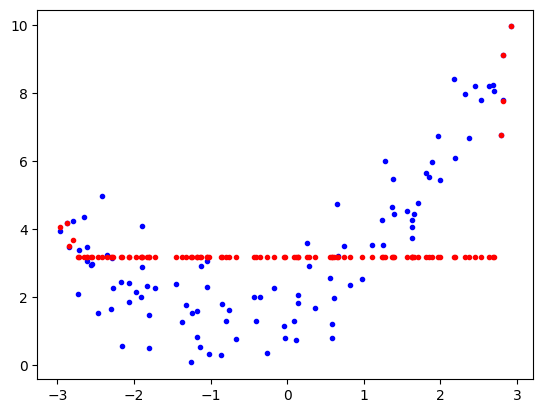

In [59]:
plt.plot(X, y, 'b.')
plt.plot(X, lin_reg.predict(X_poly), 'r.')

In [61]:
lin_reg.coef_

array([[-1.36224606e-127, -7.03729966e-129, -3.53882994e-131,
         5.47567466e-132,  3.64786682e-131, -1.80035907e-132,
        -5.22933852e-131,  4.55573224e-132, -1.21691281e-135,
         4.27922419e-136,  1.68738143e-132,  2.46480954e-131,
         5.23651664e-133, -1.64652035e-133,  9.91881167e-134,
        -2.56832425e-134, -9.00636519e-135,  1.11051772e-133,
        -8.74519242e-133, -7.72625078e-134,  1.09862300e-132,
        -6.03294009e-134, -1.70182778e-133, -3.87102754e-133,
        -1.24982770e-134, -1.08397705e-135,  2.02864124e-135,
        -3.21147170e-133,  7.30370639e-134, -3.35670836e-133,
        -3.82743884e-134,  4.21125933e-134,  8.99042766e-133,
         5.07340027e-135, -7.48226076e-134,  7.39242495e-134,
        -5.86022413e-134,  4.67395050e-134, -4.33270559e-134,
        -1.58440644e-134,  2.31881271e-134, -1.10861033e-133,
         1.61222645e-133,  9.10132316e-134, -1.25424957e-133,
         5.21374440e-135, -1.46427727e-135,  3.91756208e-138,
        

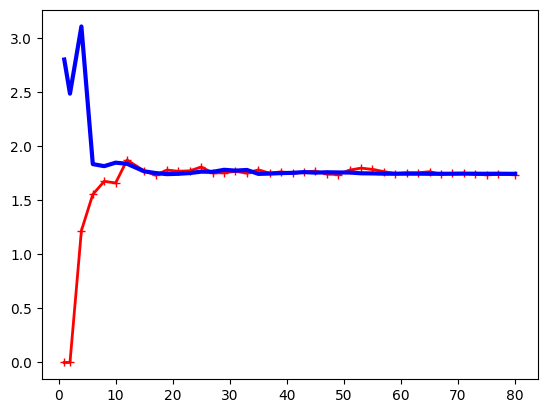

In [63]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5, scoring='neg_root_mean_squared_error')
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, 'r-+', linewidth=2, label='train')
plt.plot(train_sizes, valid_errors, 'b-', linewidth=3, label='valid')
plt.show()

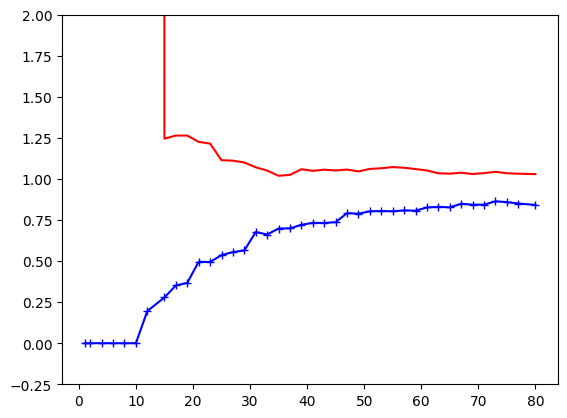

In [76]:
from sklearn.pipeline import make_pipeline

poly_reg = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression()
)

train_sizes, train_scores, valid_scores = learning_curve(poly_reg, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5, scoring='neg_root_mean_squared_error')

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, 'b-+')
plt.plot(train_sizes, valid_errors, 'r-')
plt.ylim(-0.25, 2)
plt.show()

In [74]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.82899748]])

In [78]:
sgd_reg = SGDRegressor(penalty='l2', alpha=0.1 / m, tol=None, max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.82830117])

In [79]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.77621741])

In [81]:
sgd_reg = SGDRegressor(penalty='l1', alpha=0.1)
sgd_reg.fit(X, y)
sgd_reg.predict([[1.5]])

/Users/rli/PycharmProjects/hands_on_ml/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([4.75620773])

In [83]:
from sklearn.linear_model import ElasticNet

en_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)
en_reg.fit(X, y)
en_reg.predict([[1.5]])

array([4.78114505])

In [97]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.25)

preprocessing = make_pipeline(
    PolynomialFeatures(degree=90, include_bias=False),
    StandardScaler()
)
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)

sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500

best_valid_rmse = float('inf')
best_model =None

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train.ravel())
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

In [100]:
y_train.shape, y_train.ravel().shape

((75, 1), (75,))

In [101]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [107]:
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [108]:
iris.target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[['petal width (cm)']].values
y = iris.target_names[iris.target] == 'virginica'

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [122]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

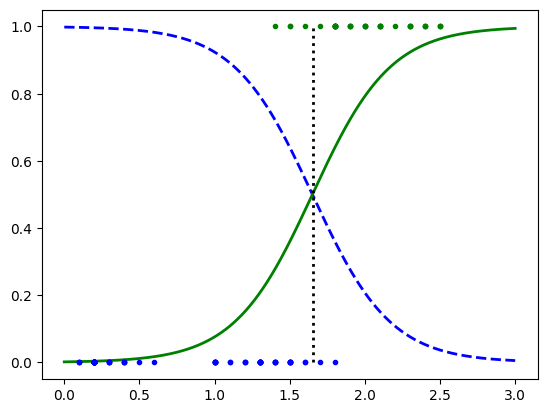

In [135]:
plt.plot(X_new, y_proba[:, 0], 'b--', linewidth=2, label="False")
plt.plot(X_new, y_proba[:, 1], 'g-', linewidth=2, label="True")
plt.plot([decision_boundary, decision_boundary], [0, 1], 'k:', linewidth=2, label='boundary')
plt.plot(X_train[y_train], y_train[y_train], 'g.')
plt.plot(X_train[~y_train], y_train[~y_train], 'b.')

In [136]:
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [137]:
softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [138]:
softmax_reg.predict([[5, 2]])

array([2])

In [139]:
softmax_reg.predict_proba([[5, 2]])

array([[3.43969828e-08, 4.08511213e-02, 9.59148844e-01]])